## Skill-Assessment Exercise 11.4

#### PROBLEM

Design a lag-lead compensator for a unity feedback system with the forward-path transfer function

$$
G(s) = \frac{K}{s(s+8)(s+30)}
$$

to meet the following specifications: %OS = 10%, $T_{p}$ = 0.6s, and $K_{v}$ = 10. Use frequency response techniques.

#### ANSWER

The Design Procedure steps from section 11.5 are followed below.

1. Using 2nd order approximation, find the closed-loop bandwidth to meet the required settling time, peak time, or rise time using Eqs 10.55 or 10.56.

Both closed-loop bandwidth equations use damping ratio instead of %OS, so OS% will first be converted to a damp rat using Eq. 4.39.

$$
\zeta = \frac{-ln(OS/100)}{\sqrt{\pi^{2}+ln^{2}(OS/100)}}
      = \frac{-ln(10/100)}{\sqrt{\pi^{2}+ln^{2}(10/100)}}
      = 0.591
$$

Since peak time is the given requirement, Eq 10.56 will be used to compute closed-loop bandwidth $\omega_{BW}$:

$$
\omega_{BW}  = \frac{\pi}{T_{p}\sqrt{1-\zeta^{2}}}\sqrt{1-2\zeta^{2}+\sqrt{4\zeta^{4}-4\zeta^{2}+2}}
$$
$$
             = \frac{\pi}{(0.6)\sqrt{1-(0.591)^{2}}}\sqrt{1-2(0.591)^{2}+\sqrt{4(0.591)^{4}-4(0.591)^{2}+2}}
$$
$$
             = 7.53 rad/s
$$

2. Set the gain $K$ such that steady-state error specification is met.

Using Eq. 7.34, set $K_{v}$ = 10 and find the gain.

$$
K_{v} = \lim_{s\to0} sG(s) = \frac{K}{(8)(30)}
$$

$$
\Rightarrow \frac{K}{(8)(30)} = 10
$$

$$
K = 2400
$$

3. Generate mag and phase Bode plots using this gain K value.

The new $G(s)$ with $K$ = 2400 is 

$$
G(s) = \frac{2400}{s(s+8)(s+30)}
$$

Bode plots for the new $G(s)$ are below.

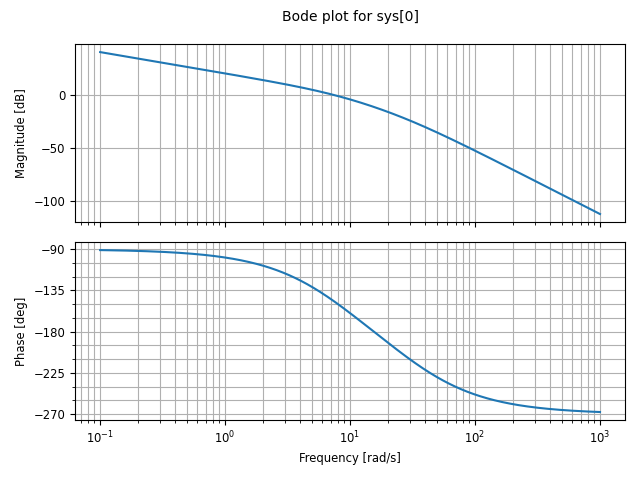

In [1]:
#  Import libraries
import numpy as np
import matplotlib.pyplot as plt
import control as ct
# Make plots interactable
%matplotlib ipympl

# Generate Bode plots for the uncompensated system G(s)
K = 2400 # System gain with ramp input steady state error such that Kv = 50
numg = [K]
deng = np.poly([0, -8, -30])
G = ct.tf(numg, deng)
fig = plt.figure(1)
ct.bode(G, [1e-1, 1e3], dB=True)

# Clean up unused variables
del K, numg, deng, G, fig

4. Using a 2nd order approximation, calculate the phase margin needed to meet the required damping ratio or %OS, using Eq. 10.73.

$$
\Phi_{M} = tan^{-1} \frac{2\zeta}{\sqrt{-2\zeta^{2}+\sqrt{1+4\zeta^{4}}}}
$$
$$
\Phi_{M} = tan^{-1} \frac{2(0.591)}{\sqrt{-2(0.591)^{2}+\sqrt{1+4(0.591)^{4}}}}
$$
$$
         = 1.02246 rads = 58.58°
$$

5. Select a new phase-margin frequency (start frequency of phase margin region) near $\omega_{BW}$.

The solutions manual (including the textbook without stating) uses 0.8 $\cdot\omega_{BW}$. The same formula will be used here. Thus the new phase-margin frequency is 0.8 $\cdot$ 7.53 = 6.024 rad/s.

6. At the new phase-margin frequency, determine the additional amount of phase needed from the lead compensator to meet the phase-margin requirement. A small additional amount of phase is also needed to counteract the negative phase from the lag compensator.

At the phase margin start frequency of 6.024 rad/s, the uncompensated system's phase is -138.33°. However, for the compensated system, this phase needs to be 180°-$\Phi_{M}$ = 180° - 58.58° = 121.42°. So the lead compensator needs to further reduce the phase by 138.33° - 121.42° = 16.91°. However, to counteract the bit of negative phase from the lag compensator, 5° will be added to the lead compensator: 16.91° + 5° = 21.91°.

So the lead compensator needs to add a total of 21.91° of phase.



7. Design the lag compensator by selecting the higher break frequency one decade below the new phase-margin frequency.

The equation for the lag portion of the compensator transfer function is Eq. 11.16

$$
G_{lag}(s) = \frac{1}{\gamma}\frac{s+\frac{1}{T_{2}}}{s+\frac{1}{\gamma T_{2}}}
$$

so $\gamma$ needs to be found, which is $\gamma = \frac{1}{\beta}$. $\beta$ can be found from Eq 11.11, where $\phi_{max}$ is the total phase contribution from the lead compensator, which is 21.91°. Eq 11.11 can be rearranged to solve and compute $\beta$:

$$
\phi_{max} = sin^{-1}\frac{1-\beta}{1+\beta}
$$
$$
\Rightarrow \beta = \frac{1-sin\phi_{max}}{1+sin\phi_{max}}
$$

$$
      = \frac{1-sin(21.91°)}{1+sin(21.91°)}
      = 0.4565
$$

So $\beta$ = 0.4565. Since $\beta$ is known, $\gamma$ is then $\frac{1}{\beta} = \frac{1}{0.4565} = 2.191$.

In Eq 11.16, the break frequencies are $\frac{1}{T_{2}}$. We choose the upper break frequency (the zero) to be one decade below the phase-margin start frequency of 6.024 rad/s, so $\frac{1}{T_{2}} = 0.6024$ rad/s. The lower break frequency (the pole) is scaled by $\frac{1}{\gamma}$, or $\frac{1}{\gamma}\frac{1}{T_{2}} = \frac{1}{2.191}\cdot 0.6024 = 0.275$ rad/s. Thus, using Eq. 11.16, the lag compensator function is

$$
G_{lag}(s) = \frac{1}{\gamma}\frac{s+\frac{1}{T_{2}}}{s+\frac{1}{\gamma T_{2}}}
           = \frac{1}{2.191}\frac{s+0.6024}{s+0.275}
$$
$$
\Rightarrow G_{lag}(s) = 0.4565\cdot\frac{s+0.6024}{s+0.275}
$$

8. Design the lead compensator using $\gamma$ from the lag compensator design, the new phase-margin start frequency, and Eqs 11.9 and 11.6.

At the phase margin start frequency of 6.024 rad/s for the lag-compensated system, the phase angle will be 180°. This is where the lead compensator will bump phase up the most, in this case by 21.91°.

The break frequencies for the lead compensator function are given in Eq. 11.6 by $\frac{1}{T}$, so $T$ needs to be found. Eq 11.9 can be used to find $T$.

$$
\omega_{max} = \frac{1}{T\sqrt{\beta}}
$$
$$
\Rightarrow T = \frac{1}{\omega_{max}\sqrt{\beta}}
$$
$$
              = \frac{1}{6.024\sqrt{0.4565}} = 0.246
$$

Thus, the lead compensator given by Eq 11.6 is

$$
G_{lead}(s) = \frac{1}{\beta} \frac{s + \frac{1}{T}}{s + \frac{1}{\beta T}}
$$
$$
         = \frac{1}{0.4565} \frac{s + 4.07}{s + \frac{1}{0.4565\cdot 0.246}}
$$
$$
G_{lead}(s) = 2.19 \cdot \frac{s + 4.07}{s + 8.90}
$$


Plots of the uncompensated and compensated systems are generated and compared below.

First, the Bode and step response plots are overlaid.

Second, these plots are generated separately using the `sisotool`, which also computes the magnitude and phase margins.

Text(0.5, 1.0, 'Uncompensated Vs Compensated Step Response')

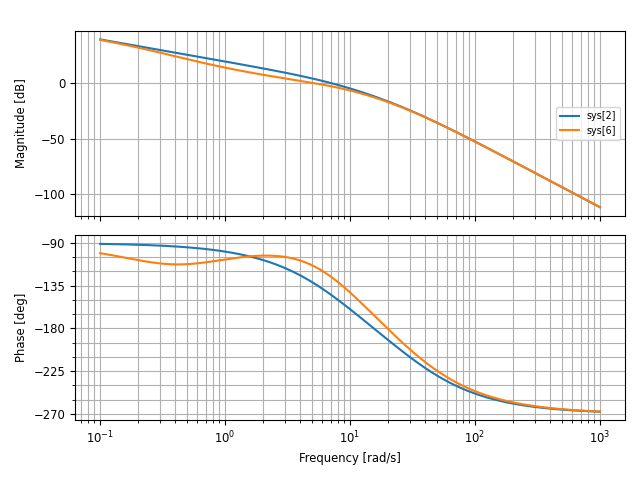

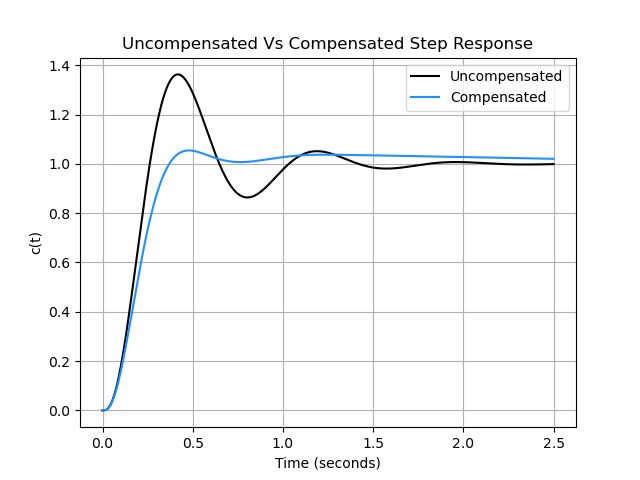

In [2]:
# Create open-loop transfer functions
Gu   = ct.zpk([],[0,-8,-30],2400)        # Uncompensated transfer function
Gla  = ct.zpk([-0.6024],[-0.275],0.4565) # Lag compensator transfer function
Gle  = ct.zpk([-4.07],[-8.90],2.19)      # Lead compensator transfer function
Gc   = Gu*Gla*Gle                        # Overall compensated transfer function

# Make transfer functions closed-loop
Tu = ct.feedback(Gu,1)                  # Uncompensated transfer function in unity feedback loop
Tc = ct.feedback(Gc,1)                  # Compensated transfer function in unity feedback loop

# Compute step responses for uncompensated and compensated transfer functions
# Time length and sample time chosen arbitrarily
t = np.arange(0, 2.5, 0.001) # Generate 2.5 second time series with 1ms sample time
Tu_resp = ct.step_response(Tu, t)
Tc_resp = ct.step_response(Tc, t)

# Compare Bode plots of uncompensated vs compensated systems
fig2 = plt.figure(2)
ct.bode(Gu, [1e-1, 1e3], dB=True)
ct.bode(Gc, [1e-1, 1e3], dB=True)

# Compare step responses of uncompensated vs compensated systems
y1 = Tu_resp.outputs['y[0]']
y2 = Tc_resp.outputs['y[0]']
fig3 = plt.figure(3) # Create and use 3rd figure
plt.plot(t,y1,'k',t,y2,'dodgerblue')
plt.grid(True)
plt.legend(['Uncompensated', 'Compensated'])
plt.ylabel('c(t)')
plt.xlabel('Time (seconds)')
plt.title('Uncompensated Vs Compensated Step Response')

The step response plot above shows that the compensated system overshoot is much less and settles faster. However, it is apparent that the steady-state is worse.

The `sisotool` function is used below to plot the uncompensated and compensated systems separately, as well as compute gain and phase margins. Notice the increase in gain and phase margin for the compensated system.

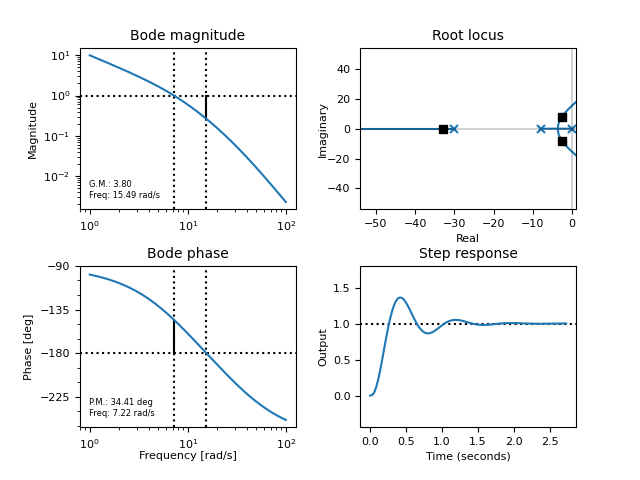

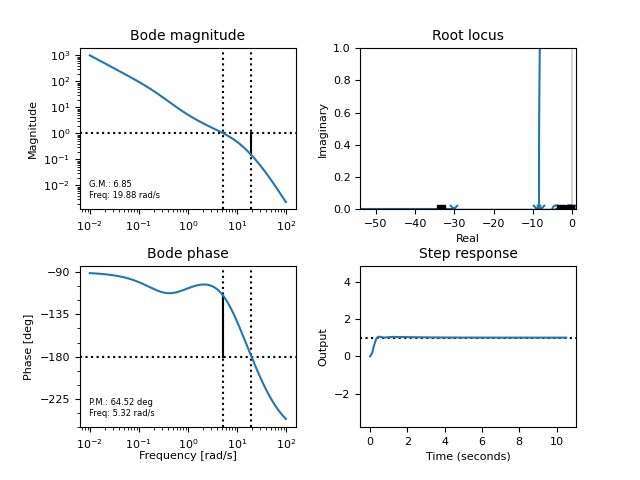

In [3]:
# Generate Bode and step response plots of uncompensated system
fig4 = plt.figure(4)
ct.sisotool(Gu,1)

# Generate Bode and step response plots of compensated system
fig5 = plt.figure(5)
ct.sisotool(Gc,1)

# Clean up workspace
del Gu, Gla, Gle, Gc, Tu, Tc, t, Tc_resp, Tu_resp, y1, y2
# del fig2, fig3, fig4, fig5